In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Vectorizer : converts v2 texts into numbers (based on freq) since ML models can't see plain texts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

In [65]:
data = pd.read_csv("nv.csv")
data.head()

,Message,Label
0,This is an amazing place,pos
1,I feel very good about these beers,pos
2,This is my best work,pos
3,What an awesome view,pos
4,I do not like this restraunt,neg


In [67]:
data.shape

(17, 2)

In [68]:
x = data.Message
y = data.Label

In [71]:
vectorizer = TfidfVectorizer()

In [78]:
new_x = vectorizer.fit_transform(x) # transform message into numbers cause ml model cant comprehend text

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(new_x,y,test_size=0.3,random_state=2)

In [81]:
#nb
clf = MultinomialNB()

In [82]:
clf.fit(xtrain,ytrain)

MultinomialNB()

In [83]:
y_pred = clf.predict(xtest)

In [84]:
# accuracy
print("Accuracy : ", metrics.accuracy_score(ytest, y_pred))

Accuracy :  0.6666666666666666


In [87]:
cm = metrics.confusion_matrix(ytest,y_pred)
print("Confusion matrix : ", cm)

Confusion matrix :  [[3 0]
 [2 1]]


<AxesSubplot: >

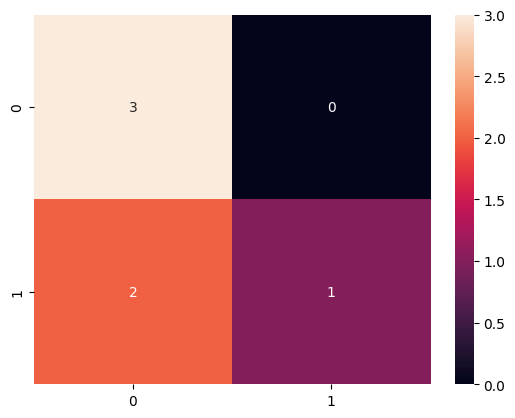

In [93]:
#heatmap
sns.heatmap(cm, annot=True)